# **Fake News Detection using Logistic Regression and Naive Baye**


---



Objective

---



The objective of this project is to build a supervised machine learning model to classify news articles as Fake or Real using Natural Language Processing (NLP) techniques.

The project applies TF-IDF vectorization to convert textual data into numerical features and compares the performance of two baseline classification models:

*   Logistic Regression
*   Multinomial Naive Bayes
:
The models are evaluated using accuracy, confusion matrix, and classification metrics to determine their effectiveness in fake news detection.

Fake news detection is an important application of machine learning in combating misinformation and improving content reliability in digital media.

---



**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    recall_score,
    classification_report,
    f1_score,
    precision_score



)


**Loading and labelling Datasets**

In [ ]:
FakeNews = pd.read_csv('Fake.csv')
RealNews = pd.read_csv('True.csv')

FakeNews = FakeNews.assign(label = 0)
RealNews = RealNews.assign(label = 1)

data = pd.concat([FakeNews, RealNews])
data = data.sample(frac=1).reset_index(drop=True)



print(FakeNews.head())
print(RealNews.head())

X = data['text']
y = data['label']

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
                                               title  \
0  As U.S. budget fight looms, Republicans

**EDA**

In [ ]:
data.shape
data["label"].value_counts()
data["text"].isnull().sum()

np.int64(0)

In [ ]:
print(data['label'].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64




**Cleaning the text**



In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

**Train/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train.head())

36335    Sounds about right. Thank goodness for the new...
12384    Donald Trump infuriates even the most compassi...
24419    MOSCOW (Reuters) - The Kremlin said on Monday ...
24740    Rachel Maddow always brings us the most entert...
27039                                                     
Name: text, dtype: object


In [ ]:
print(y_train.head())

36335    0
12384    0
24419    1
24740    0
27039    0
Name: label, dtype: int64


**TF-IDF vectorization**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Model 1: Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_vec, y_train)


LogisticRegression()

**Model 2: Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

PredictionY = nb.predict(X_test_vec)

print("\n--- Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, PredictionY))
print("Confusion matrix:\n", confusion_matrix(y_test, PredictionY))
print(classification_report(y_test, PredictionY, target_names=["Fake (0)", "Real (1)"]))


--- Naive Bayes ---
Accuracy: 0.9367483296213809
Confusion matrix:
 [[4413  280]
 [ 288 3999]]
              precision    recall  f1-score   support

    Fake (0)       0.94      0.94      0.94      4693
    Real (1)       0.93      0.93      0.93      4287

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



**Logistic Regression - Sample Prediction**

In [ ]:
TestVec = vectorizer.transform(X_test)
FinalPred = logreg.predict(TestVec)


for p in FinalPred[:20]:
  if p == 1:
    print("likely real")
  else:
    print("likely fake")

likely real
likely fake
likely fake
likely real
likely fake
likely real
likely fake
likely real
likely real
likely fake
likely fake
likely real
likely fake
likely fake
likely fake
likely real
likely real
likely real
likely real
likely fake


**Naive Bayes - Sample Prediction**

In [ ]:
TestVec = vectorizer.transform(X_test)
NBpred = nb.predict(TestVec)


for p in NBpred[:20]:
  if p == 1:
    print("likely real")
  else:
    print("likely fake")

likely real
likely fake
likely fake
likely real
likely fake
likely real
likely fake
likely real
likely real
likely fake
likely fake
likely real
likely real
likely fake
likely fake
likely fake
likely fake
likely real
likely real
likely fake


In [ ]:
print(y.value_counts())
print(logreg.classes_)
print(accuracy_score(y_test, FinalPred))

label
0    23481
1    21417
Name: count, dtype: int64
[0 1]
0.9869710467706013


**Interactive News Classification Demo**

In [ ]:


def classify_article(article_text, model, model_name="Model"):

    cleaned = clean_text(article_text)
    vec = vectorizer.transform([cleaned])

    pred = model.predict(vec)[0]
    prob_real = model.predict_proba(vec)[0][1]

    pred_label = "Real" if pred == 1 else "Fake"
    return pred_label, round(prob_real, 3)


def demo_prediction(article_text):

    print("\n" + "="*60)
    print("ARTICLE (snippet):")
    print(article_text[:300] + ("..." if len(article_text) > 300 else ""))
    print("="*60)


    lr_label, lr_prob = classify_article(article_text, logreg, "LogReg")
    print(f"[LogReg] Prediction: {lr_label:>4} | P(Real): {lr_prob}")


    nb_label, nb_prob = classify_article(article_text, nb, "Naive Bayes")
    print(f"[NB]    Prediction: {nb_label:>4} | P(Real): {nb_prob}")




example_2 = "BREAKING: Doctors hate him! One simple trick cures everything overnight — shocking results revealed."



demo_prediction(example_2)




ARTICLE (snippet):
BREAKING: Doctors hate him! One simple trick cures everything overnight — shocking results revealed.
[LogReg] Prediction: Fake | P(Real): 0.032
[NB]    Prediction: Fake | P(Real): 0.09


**Comparison of Evaluation Metrics**

In [ ]:
logreg_accuracy = accuracy_score(y_test, FinalPred)
logreg_precision = precision_score(y_test, FinalPred)
logreg_recall = recall_score(y_test, FinalPred)
logreg_f1 = f1_score(y_test, FinalPred)


nb_accuracy = accuracy_score(y_test, PredictionY)
nb_precision = precision_score(y_test, PredictionY)
nb_recall = recall_score(y_test, PredictionY)
nb_f1 = f1_score(y_test, PredictionY)







comparison = pd.DataFrame()

comparison["Model"] = ["Logistic Regression", "Naive Bayes"]
comparison["Accuracy"] = [logreg_accuracy, nb_accuracy]
comparison["Precision"] = [logreg_precision, nb_precision]
comparison["Recall"] = [logreg_recall, nb_recall]
comparison["F1 Score"] = [logreg_f1, nb_f1]

comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.986971,0.985561,0.987171,0.986365
1,Naive Bayes,0.936748,0.934564,0.932820,0.933691


In [ ]:
print(confusion_matrix(y_test, FinalPred))

[[4631   62]
 [  55 4232]]


**Visualizing Data**

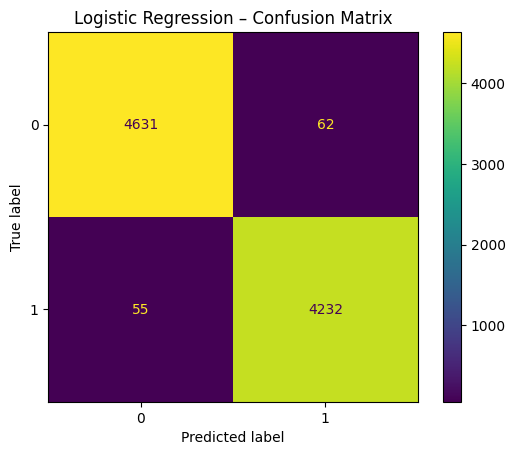

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, FinalPred)
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

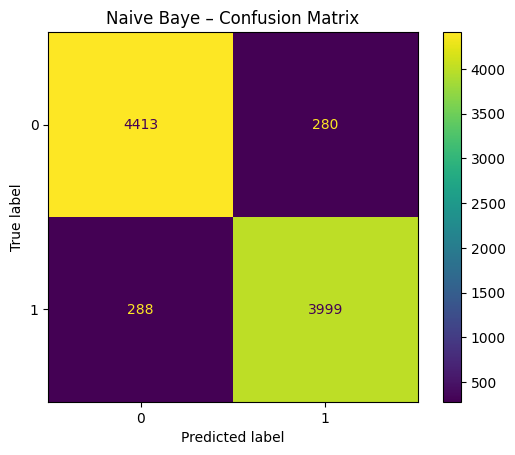

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, NBpred)
plt.title("Naive Baye – Confusion Matrix")
plt.show()

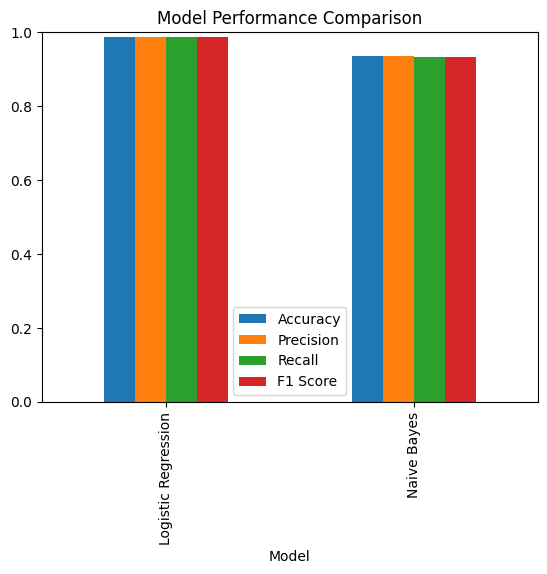

In [ ]:

comparison.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot.bar()
plt.ylim(0,1)
plt.title("Model Performance Comparison")
plt.show()

**Conclusion**


---


This project applied TF-IDF vectorization with two baseline classifiers—Logistic Regression and Multinomial Naive Bayes—for fake news detection. Logistic Regression achieved higher performance across all metrics (Accuracy, Precision, Recall, and F1-score), indicating that linear models with TF-IDF features are effective for text classification. Naive Bayes provided a fast baseline but underperformed compared to Logistic Regression. Future improvements include experimenting with n-grams, cross-validation, and alternative vectorization methods.